<a href="https://colab.research.google.com/github/prati25/Project-Netflix-movies-and-TV-shows-clustering/blob/main/Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Solution :**

## **Importing The Libraries :**

In [1]:
# Importing necessary libraries :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.util.testing as tm
%matplotlib inline
import seaborn as sns
import math
import scipy.stats as stat
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10


#necessary imports for plotly and map :

import os
import re
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import re, string, unicodedata
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from keras.preprocessing.text import Tokenizer

from sklearn import preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


#word cloud imports :

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


## **Importing The Dataset :**

In [2]:
# Mount the drive :

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
NETFLIX_pk=pd.read_csv('/content/drive/MyDrive/Capston Project/Netflix Movies and TV shows clustering/ NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

## **Data -Exploration**

In [8]:
# top 5 rows from Dataset :

NETFLIX_pk.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [9]:
# top 5 rows from dataset :

NETFLIX_pk.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## **Shape of Netflix data :**

In [12]:
# Shape of dataset :

NETFLIX_pk.shape

(7787, 12)

In [11]:
# Columns in dataset :

NETFLIX_pk.columns 

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## **Summary of data :**


In [13]:
NETFLIX_pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [14]:
# Statistical information :

NETFLIX_pk.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [15]:
# Unique values :

NETFLIX_pk.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

**1. Data set 7787 rows and 12 columns.**

**2. Need to clean the data set.**

# **Exploratory Data Analysis (EDA)**



---



---




## **Dealing with Duplicate Values :**

In [16]:
# Count Duplicate Values : 

NETFLIX_pk.duplicated().sum()

0

Now, NO duplicate values are present in dataset. 

## **Null Values :**  

In [17]:
# Count of Null values :

NETFLIX_pk.isnull().sum()   

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [18]:
for i in NETFLIX_pk.columns:
    null_rate = NETFLIX_pk[i].isna().sum() / len(NETFLIX_pk) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 30.68%
cast null rate: 9.22%
country null rate: 6.51%
date_added null rate: 0.13%
rating null rate: 0.09%


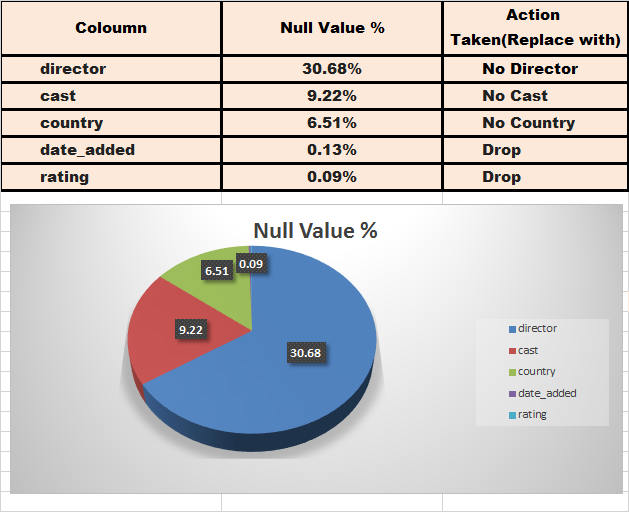

In [19]:
NETFLIX_pk['country'] = NETFLIX_pk['country'].fillna('No Country')
NETFLIX_pk['director'] = NETFLIX_pk['director'].fillna('No Director')
NETFLIX_pk['cast'] = NETFLIX_pk['cast'].fillna('No Cast')
NETFLIX_pk.dropna(subset=['date_added','rating'],inplace=True)

In [20]:
NETFLIX_pk.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [22]:
# Create new features to store date, day, month and year seperately :

# First convert date_added to date time format.
NETFLIX_pk["date_added"] = pd.to_datetime(NETFLIX_pk['date_added'])
  
# Compute day. 
NETFLIX_pk['day_added'] = NETFLIX_pk['date_added'].dt.day   

# Compute year.         
NETFLIX_pk['year_added'] = NETFLIX_pk['date_added'].dt.year

# Compute mount.
NETFLIX_pk['month_added'] = NETFLIX_pk['date_added'].dt.month        

# **Data Visualisations**

### **1. Content Type On Netflix :**

In [23]:
olors = ['	#db0000', '	#564d4d']
labels = ['Tv Show', 'Movie']
tv_show = NETFLIX_DF.type.value_counts()[1]
movie = NETFLIX_DF.type.value_counts()[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=[tv_show, movie], hole=.6)])
fig.update_layout(
    title_text="Type of content watched on Netflix",title_x=0.5, legend=dict(x=0.9),height=500, width=500,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Type of content.', font_size=20, showarrow=False)])


### **Movies are clearly more popular on Netflix than TV shows.**

###  **2.Content growth over years :**

In [24]:
# Plot growth of the contents over the years :

tv_show = NETFLIX_pk[NETFLIX_pk["type"] == "TV Show"]
movie = NETFLIX_pk[NETFLIX_pk["type"] == "Movie"]

col = "year_added"

content_1 = tv_show[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "count", "index" : col})
content_1 = content_1.sort_values(col)

content_2 = movie[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "count", "index" : col})
content_2 = content_2.sort_values(col)

trace1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color="#db0000"))
trace2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color="#564d4d"))

data = [trace1, trace2]
layout = go.Layout(title="Content added over the years",title_x=0.15, legend=dict(x=0.4, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

  I.The highest number of movies and tv shows got added in 2019 and 2020.

  II.Growth in the number of movies on Netflix is much higher than tv shows

### **3. Top 5 Genres for Movies/Shows on Netflix :**

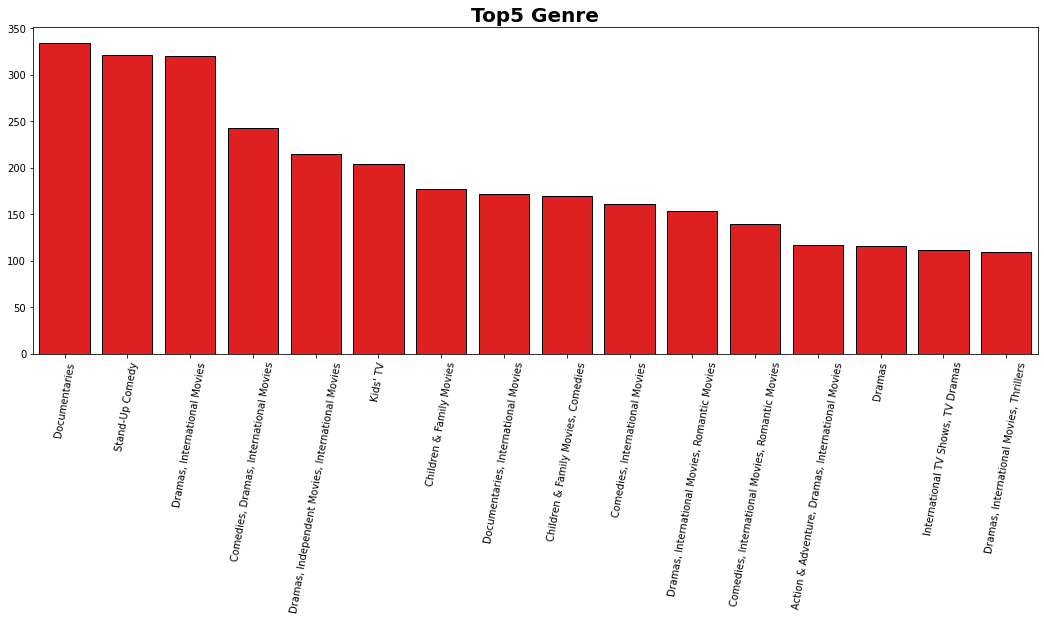

In [25]:
# Top 5 Genre :

plt.figure(figsize=(18,6))
plt.style.use("default")
sns.barplot(x = NETFLIX_pk["listed_in"].value_counts().head(16).index,
            y = NETFLIX_pk["listed_in"].value_counts().head(16).values,palette=["red"],edgecolor = "Black")
plt.xticks(rotation=80)
plt.title("Top5 Genre",size='20',fontweight="bold")
plt.show()


### **4. Top ten countries that produce most of the content :**

In [27]:
country_PK=NETFLIX_pk['country'].value_counts().reset_index()
country_PK.rename(columns={'index': 'Country_Name'}, inplace=True)
country_PK.rename(columns={'Country': 'Count'}, inplace=True)

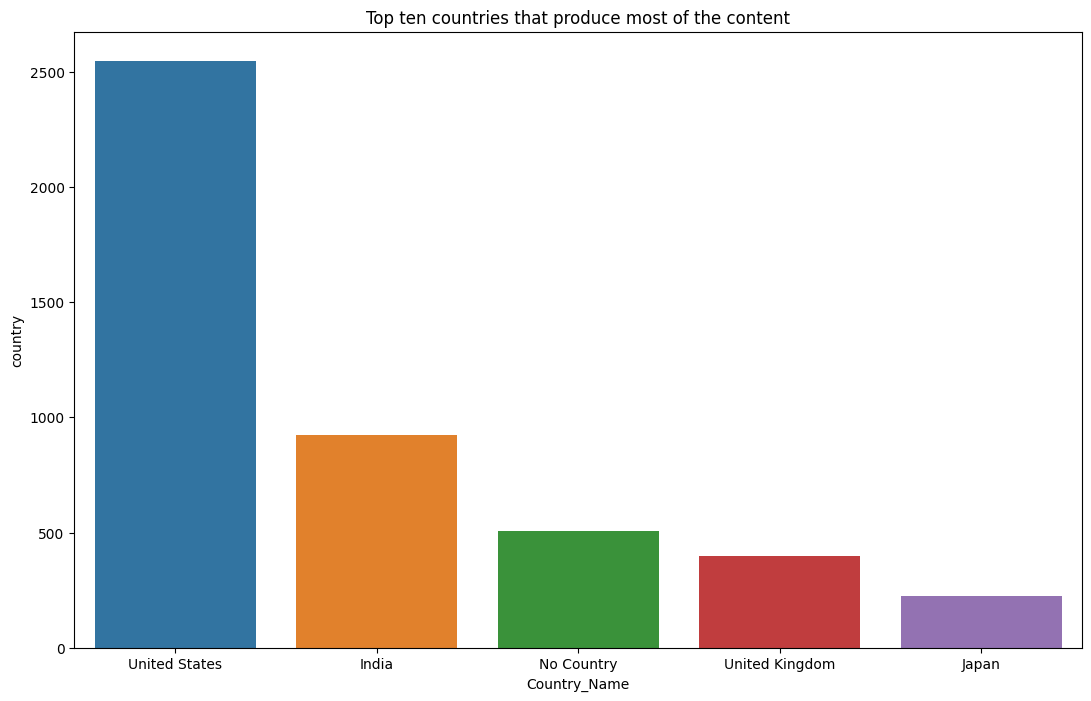

In [28]:
plt.figure(figsize=(13,8))
plt.title('Top ten countries that produce most of the content')
sns.barplot(x='Country_Name',y='country',data=country_PK.head())

### **5.We saw before in which year most of the content was added, but what about the year it released :**


In [30]:
# Put the data into bins :

release_yr_bin = pd.cut(NETFLIX_pk.release_year, [1924, 1999, 2010, 2021])
release_yr_bin.value_counts()
release_yr_bin = pd.DataFrame(release_yr_bin.value_counts()).reset_index()
release_yr_bin.rename(columns={'index':'year_interval', 'release_year':'count'}, inplace=True)
release_yr_bin['year_interval'] = release_yr_bin['year_interval'].astype('string')
release_yr_bin

,year_interval,count
0,"(2010, 2021]",6425
1,"(1999, 2010]",896
2,"(1924, 1999]",449


In [31]:
# Plot it :

fig = px.pie(release_yr_bin, values='count', names='year_interval', color_discrete_sequence=px.colors.sequential.RdBu, title='Most content released.',height=500, width=500)
fig.show()

### **6. Actore cast in movies/shows :**

In [32]:
# Create a list of all the actors in the data :

def data2list(data):

# dict to store the count for each actor :
  actor_list = {} 

# list to store all the names :  
  temp_list = []   
  
# define the data we intend to use :
  cast_list = list(data['cast'])  
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list

In [33]:
# Create dataframe for list of actors :

actor_list = pd.DataFrame([data2list(NETFLIX_pk)]).T.reset_index()


# dropped the nan values in the dataframe which was present at 106th index :

actor_list = actor_list.sort_values(0, ascending=False).drop(106)  

In [34]:
actor_list.head(10)

,index,0
1294,Anupam Kher,38
194,Takahiro Sakurai,28
2203,Om Puri,27
4039,Shah Rukh Khan,27
740,Boman Irani,25
2506,Paresh Rawal,24
8462,Andrea Libman,24
4368,Yuki Kaji,23
4994,Vincent Tong,22
2201,Akshay Kumar,22


In [35]:
# Plot it :

top_10_actors = actor_list.head(10)
top_10_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

fig = px.bar(top_10_actors, x='Actors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#564d4d', '#db0000'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Actors with most content on platform.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
fig.show()

### **7. What kind of content is available in different countries in recent years?**


In [36]:
NETFLIX_pk['country'].fillna('United States', inplace=True)
NETFLIX_pk['country_single'] = NETFLIX_pk['country'].apply(lambda x: x.split(",")[0])
country_order = NETFLIX_pk['country_single'].value_counts()[:10].index
countryVScontent = NETFLIX_pk[['type', 'country_single']].groupby('country_single')['type'].value_counts().unstack().loc[country_order].reset_index()
countryVScontent

type,index,Movie,TV Show
0,United States,2097.0,777.0
1,India,883.0,73.0
2,United Kingdom,341.0,235.0
3,No Country,229.0,276.0
4,Canada,175.0,84.0
5,Japan,75.0,160.0
6,France,137.0,59.0
7,South Korea,42.0,152.0
8,Spain,119.0,49.0
9,Mexico,79.0,44.0


In [37]:
# Plot the above data :
fig = go.Figure()
fig.add_trace(go.Bar(
    y=countryVScontent['index'],
    x=countryVScontent['Movie'],
    name='Movies',
    orientation='h',
    marker=dict(
        color='rgba(219, 0, 0, 1)'
    )
))
fig.add_trace(go.Bar(
    y=countryVScontent['index'],
    x=countryVScontent['TV Show'],
    name='TV Show',
    orientation='h',
    marker=dict(
        color='rgba(86, 77, 77, 1)'
    )
))

fig.update_layout(barmode='stack',
                   title={'text': 'Top ten countries and the content they provide.',
                          'y':0.89,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'}
                  )
fig.show()

1.The United States is a leading producer of both types of content; this makes sense since Netflix is a US company.

2.The influence of Bollywood in India explains the type of content available, and perhaps the main focus of this industry is Movies and not TV Shows.

###**8. Netflix Movie Duration Distribution :**

In [38]:
NETFLIX_pk['duration']=NETFLIX_pk['duration'].str.replace('Season','')
NETFLIX_pk['duration']=NETFLIX_pk['duration'].str.replace('s','')
NETFLIX_pk['duration']=NETFLIX_pk['duration'].str.replace('min','')

NETFLIX_pk['duration']=NETFLIX_pk['duration'].astype(str).astype(int)
NETFLIX_pk['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7770, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



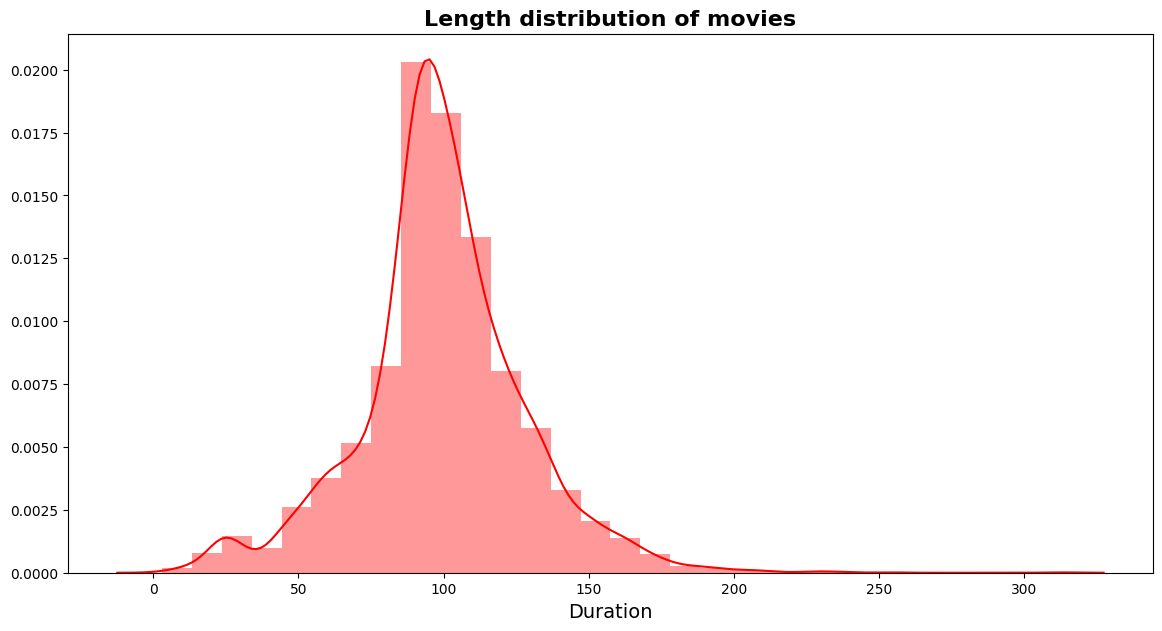

In [42]:
# Length distribution of movies :

movie_PK = NETFLIX_pk[NETFLIX_pk['type']=='Movie']

plt.figure(figsize=(14, 7))
plt.style.use("default")
sns.distplot(movie_PK['duration'], bins=30,color='red',kde_kws={"color":"Red"}).set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

**Most of the movies last for 90 to 120 minutes.**

### **9.Country VS Type :**





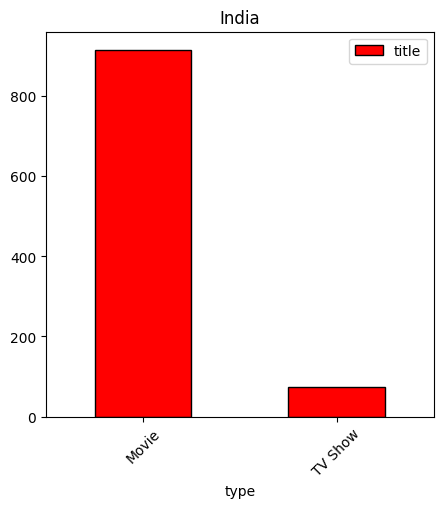

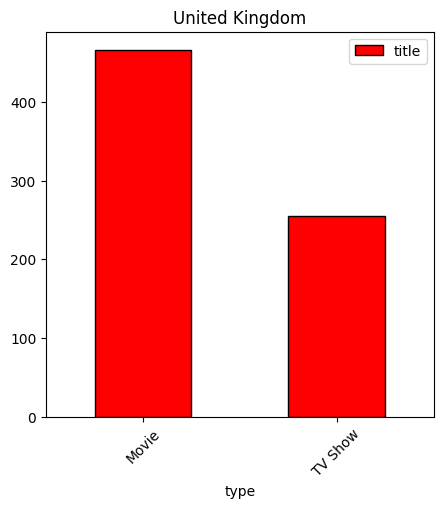

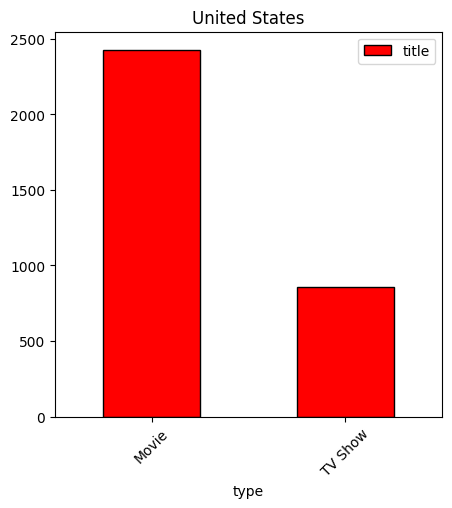

In [43]:
#get all country type preference :

def get_country_type_trends(df):
  def explode_country(country):
    try:
        return country.split(", ")
    except:
        return ""
  df['country_list'] = df.apply(lambda x: explode_country(x['country']),axis=1)
  df = df.explode('country_list')
  grouped_df_ = df.groupby(['country_list','type']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  rating_country_df = grouped_df.reset_index().drop("index", axis=1)
  list_of_countries = list(set(list(rating_country_df['country_list'].values)))
  for each in list_of_countries:
    if each in ['United States','India','United Kingdom']:
      plt.style.use('default')
      rating_country_df[rating_country_df['country_list'] == each].sort_values("title",ascending=False).plot.bar(x = "type", y="title", color="red", rot=45, figsize=(5,5),edgecolor='Black')
      plt.title(f"{each}")
      plt.grid(False)

get_country_type_trends(NETFLIX_pk)

### **10.Summary of Content by Rating :**





In [44]:
movies_rating = dict(movie['rating'].value_counts())
tv_shows_rating = dict(tv_show['rating'].value_counts())

In [45]:
# Plot the count of ratings for Tv shows and movies to understand them better.
fig = go.Figure()
fig.add_trace(go.Bar(x=list(tv_shows_rating.keys()),
                y=list(tv_shows_rating.values()),
                text=list(tv_shows_rating.values()),
                name='Tv-Shows',
                marker_color='rgb(219,0,0)'
                ))
fig.add_trace(go.Bar(x=list(movies_rating.keys()),
                y=list(movies_rating.values()),
                text=list(movies_rating.values()),
                name='Movies',
                marker_color='rgb(86,77,77)'
                ))

fig.update_layout(
    title='Ratings',title_x=0.47,
    xaxis_tickfont_size=15,
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.19,
    bargroupgap=0.2 
)
fig.show()

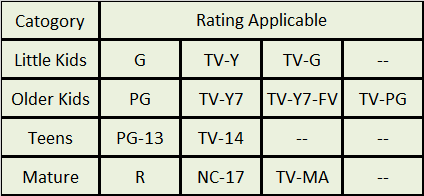

We can observed from above table what rating is applicable for which age group,
TV-MA that is Mature content is most feverate in netflix



